## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [401]:
# import the necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sfm
import statsmodels.api as sm
%matplotlib inline

plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')


In [330]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [331]:
df.sort_values("price")

id        date      price  bedrooms  bathrooms  sqft_living  \
15279    40000362    5/6/2014    78000.0         2       1.00          780   
465    8658300340   5/23/2014    80000.0         1       0.75          430   
16184  3028200080   3/24/2015    81000.0         2       1.00          730   
8267   3883800011   11/5/2014    82000.0         3       1.00          860   
2139   1623049041    5/8/2014    82500.0         2       1.00          520   
...           ...         ...        ...       ...        ...          ...   
1446   8907500070   4/13/2015  5350000.0         5       5.00         8000   
4407   2470100110    8/4/2014  5570000.0         5       5.75         9200   
9245   9208900037   9/19/2014  6890000.0         6       7.75         9890   
3910   9808700762   6/11/2014  7060000.0         5       4.50        10040   
7245   6762700020  10/13/2014  7700000.0         6       8.00        12050   

       sqft_lot  floors waterfront       view  ...          grade sqft_above  \
15279     16344     1.0         NO       NONE  ...         5 Fair        780   
465        5050     1.0        NaN       NONE  ...          4 Low        430   
16184      9975     1.0        NaN       NONE  ...         5 Fair        730   
8267      10426     1.0         NO       NONE  ...  6 Low Average        860   
2139      22334     1.0         NO       NONE  ...         5 Fair        520   
...         ...     ...        ...        ...  ...            ...        ...   
1446      23985     2.0         NO  EXCELLENT  ...      12 Luxury       6720   
4407      35069     2.0         NO       NONE  ...     13 Mansion       6200   
9245      31374     2.0         NO  EXCELLENT  ...     13 Mansion       8860   
3910      37325     2.0        YES    AVERAGE  ...   11 Excellent       7680   
7245      27600     2.5         NO       GOOD  ...     13 Mansion       8570   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
15279            0.0     1942           NaN    98168  47.4739 -122.280   
465              0.0     1912           0.0    98014  47.6499 -121.909   
16184            0.0     1943           0.0    98168  47.4808 -122.315   
8267             0.0     1954           0.0    98146  47.4987 -122.341   
2139             0.0     1951           0.0    98168  47.4799 -122.296   
...              ...      ...           ...      ...      ...      ...   
1446          1280.0     2009           0.0    98004  47.6232 -122.220   
4407          3000.0     2001           NaN    98039  47.6289 -122.233   
9245          1030.0     2001           0.0    98039  47.6305 -122.240   
3910          2360.0     1940        2001.0    98004  47.6500 -122.214   
7245          3480.0     1910        1987.0    98102  47.6298 -122.323   

       sqft_living15  sqft_lot15  
15279           1700       10387  
465             1200        7500  
16184            860        9000  
8267            1140       11250  
2139            1572       10570  
...              ...         ...  
1446            4600       21750  
4407            3560       24345  
9245            4540       42730  
3910            3930       25449  
7245            3940        8800  

[21597 rows x 21 columns]

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [333]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [334]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [335]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [336]:
# function to check null values
def check_null(df):
    return df.isna().sum()

In [337]:
check_null(df)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [338]:
# function to calculate percentage of null values
def miss_percent(df,col):
    miss = ((df[col].isna().sum()) / len(df[col])) * 100
    return print(f'There is {miss} percent of values missing in {col}.')

In [339]:
# checking percentage of missing values in waterfront
miss_percent(df,'waterfront')
miss_percent(df, 'view')
miss_percent(df, 'yr_renovated')

There is 11.00152798999861 percent of values missing in waterfront.
There is 0.29170718155299347 percent of values missing in view.
There is 17.78950780200954 percent of values missing in yr_renovated.


In [340]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [341]:
# function to replace null with a specificied value
def replace_nan(df,col, replace_value):
    return df[col].fillna(replace_value, inplace=True)

In [342]:
replace_nan(df,'yr_renovated',0)

In [375]:
#Function to identify duplicates
duplicates = []
def identify_duplicates(data):
    for i in data.duplicated():
        duplicates.append(i)
    
    duplicates_set = set(duplicates)
    if(len(duplicates_set) == 1):
        print('The data has no duplicates')
    else:
        duplicates_rows = 0
        for j in duplicates:
            if (j == True):
                duplicates_rows += 1
                #percentage of data represented by duplicates
                duplicates_percentage = np.round(((duplicates_rows/len(data)) * 100), 2)
                print(f'The data has {duplicates_rows} duplicated rows')
                print(f'Duplicated rows constitute of {duplicates_percentage}% of the dataframe')




identify_duplicates(df)

The data has 1 duplicated rows
Duplicated rows constitute of 0.0% of the dataframe
The data has 2 duplicated rows
Duplicated rows constitute of 0.01% of the dataframe
The data has 3 duplicated rows
Duplicated rows constitute of 0.01% of the dataframe
The data has 4 duplicated rows
Duplicated rows constitute of 0.02% of the dataframe
The data has 5 duplicated rows
Duplicated rows constitute of 0.02% of the dataframe


In [376]:
df.drop_duplicates(subset=df.columns, keep='first', inplace=True)

In [377]:
#replacing the null values with zero
replace_nan(df,'waterfront', 0)

In [346]:
#replacing the null values with zero
replace_nan(df,'view', 0)

In [347]:
df['yr_renovated'].fillna(df['yr_built'], inplace=True)

In [348]:
check_null(df)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Date has dtype as object therefore we split month and date date to get discrete values

In [349]:
# function to change data type to datetime
def change_to_datetime(df, col):
    ''' Changes column to DateTime object'''
    df[col] = pd.to_datetime(df[col])
    return df.info()

In [350]:
change_to_datetime(df, 'date')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [351]:
df.corr().abs()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000  0.016772  0.001150   0.005162     0.012241  0.131911   
price          0.016772  1.000000  0.308787   0.525906     0.701917  0.089876   
bedrooms       0.001150  0.308787  1.000000   0.514508     0.578212  0.032471   
bathrooms      0.005162  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living    0.012241  0.701917  0.578212   0.755758     1.000000  0.173453   
sqft_lot       0.131911  0.089876  0.032471   0.088373     0.173453  1.000000   
floors         0.018608  0.256804  0.177944   0.502582     0.353953  0.004814   
sqft_above     0.010799  0.605368  0.479386   0.686668     0.876448  0.184139   
yr_built       0.021617  0.053953  0.155670   0.507173     0.318152  0.052946   
yr_renovated   0.010612  0.117855  0.017900   0.047177     0.051060  0.004979   
zipcode        0.008211  0.053402  0.154092   0.204786     0.199802  0.129586   
lat            0.001798  0.306692  0.009951   0.024280     0.052155  0.085514   
long           0.020672  0.022036  0.132054   0.224903     0.241214  0.230227   
sqft_living15  0.002701  0.585241  0.393406   0.569884     0.756402  0.144763   
sqft_lot15     0.138557  0.082845  0.030690   0.088303     0.184342  0.718204   

                 floors  sqft_above  yr_built  yr_renovated   zipcode  \
id             0.018608    0.010799  0.021617      0.010612  0.008211   
price          0.256804    0.605368  0.053953      0.117855  0.053402   
bedrooms       0.177944    0.479386  0.155670      0.017900  0.154092   
bathrooms      0.502582    0.686668  0.507173      0.047177  0.204786   
sqft_living    0.353953    0.876448  0.318152      0.051060  0.199802   
sqft_lot       0.004814    0.184139  0.052946      0.004979  0.129586   
floors         1.000000    0.523989  0.489193      0.003793  0.059541   
sqft_above     0.523989    1.000000  0.424037      0.020645  0.261570   
yr_built       0.489193    0.424037  1.000000      0.202555  0.347210   
yr_renovated   0.003793    0.020645  0.202555      1.000000  0.062397   
zipcode        0.059541    0.261570  0.347210      0.062397  1.000000   
lat            0.049239    0.001199  0.148370      0.027970  0.266742   
long           0.125943    0.344842  0.409993      0.064543  0.564259   
sqft_living15  0.280102    0.731767  0.326377      0.000683  0.279299   
sqft_lot15     0.010722    0.195077  0.070777      0.004286  0.147294   

                    lat      long  sqft_living15  sqft_lot15  
id             0.001798  0.020672       0.002701    0.138557  
price          0.306692  0.022036       0.585241    0.082845  
bedrooms       0.009951  0.132054       0.393406    0.030690  
bathrooms      0.024280  0.224903       0.569884    0.088303  
sqft_living    0.052155  0.241214       0.756402    0.184342  
sqft_lot       0.085514  0.230227       0.144763    0.718204  
floors         0.049239  0.125943       0.280102    0.010722  
sqft_above     0.001199  0.344842       0.731767    0.195077  
yr_built       0.148370  0.409993       0.326377    0.070777  
yr_renovated   0.027970  0.064543       0.000683    0.004286  
zipcode        0.266742  0.564259       0.279299    0.147294  
lat            1.000000  0.135371       0.048679    0.086139  
long           0.135371  1.000000       0.335626    0.255586  
sqft_living15  0.048679  0.335626       1.000000    0.183515  
sqft_lot15     0.086139  0.255586       0.183515    1.000000

In [352]:
df.drop(['id','date'], axis=1, inplace=True )

In [353]:
df.corr()['price'].abs()

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.117855
zipcode          0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

In [354]:
df['bathrooms'] = df['bathrooms'].apply(np.ceil).astype(int)
df['bathrooms']


0        1
1        3
2        1
3        3
4        2
        ..
21592    3
21593    3
21594    1
21595    3
21596    1
Name: bathrooms, Length: 21597, dtype: int64

In [355]:
df['waterfront'].value_counts()

NO     19075
0       2376
YES      146
Name: waterfront, dtype: int64

In [356]:
# function to replace a value with another
def substitute(df,col,original_value, sub_value):
    return df[col].replace(original_value, sub_value, inplace=True)

In [357]:
# changing YES to  1
substitute(df,'waterfront','YES',1)

# changing NO to  0
substitute(df, 'waterfront', 'NO', 0)

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  int64  
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [359]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
0               63
Name: view, dtype: int64

In [360]:
substitute(df,'view',['NONE','FAIR','AVERAGE','GOOD','EXCELLENT'],[0,1,2,3,4])


In [361]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [362]:
substitute(df,'condition',['Poor','Fair','Average','Good','Very Good'],[1,2,3,4,5])

In [363]:
df['grade']

0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21597, dtype: object

In [364]:
substitute(df,'grade',['7 Average','8 Good','9 Better','6 Low Average','10 Very Good','11 Excellent',
                      '5 Fair','12 Luxury','4 Low','13 Mansion','3 Poor'], [7,8,9,6,10,11,5,12,4,13,3])

In [365]:
substitute(df, 'sqft_basement', '?', 0.0)
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [366]:
#a fucntion for converting yr_renovated to categorical data o for not renovated and 1 for renovated
def convert_yr (a):
    if a > 0:
        return 1
    else:
        return 0
    return x

In [367]:
df['yr_renovated'].apply(convert_yr )
df['renovated'] = df['yr_renovated'].apply(convert_yr)
df['renovated'].value_counts()

0    20853
1      744
Name: renovated, dtype: int64

In [368]:
#q1 - (1.5 * iqr * (len(df[col])/(len(df[col]) + 1)))

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  int64  
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

## Check whether Price has a normal distribution

Text(0.5, 1.0, 'Price distribution')

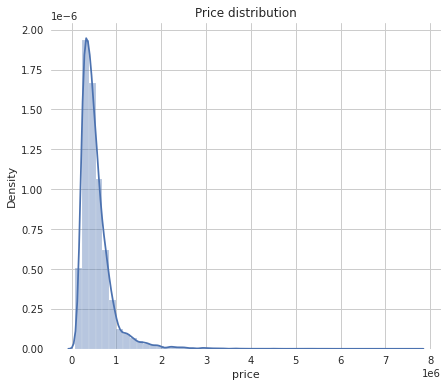

In [383]:
plt.figure(figsize=(7,6))
dist=sns.distplot(df["price"])
dist.set_title("Price distribution")

Text(0.5, 1.0, 'Normalized house prices distribution')

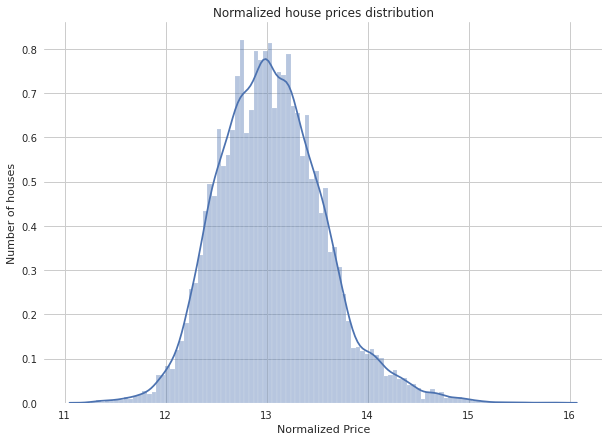

In [384]:
#Normalizing Price Distribution
fig, ax = plt.subplots(figsize=(10, 7))

sns.distplot(np.log(df['price']), bins = 100) 

ax.set_xlabel("Normalized Price")
ax.set_ylabel("Number of houses")
ax.set_title("Normalized house prices distribution")

## Multicollinearity

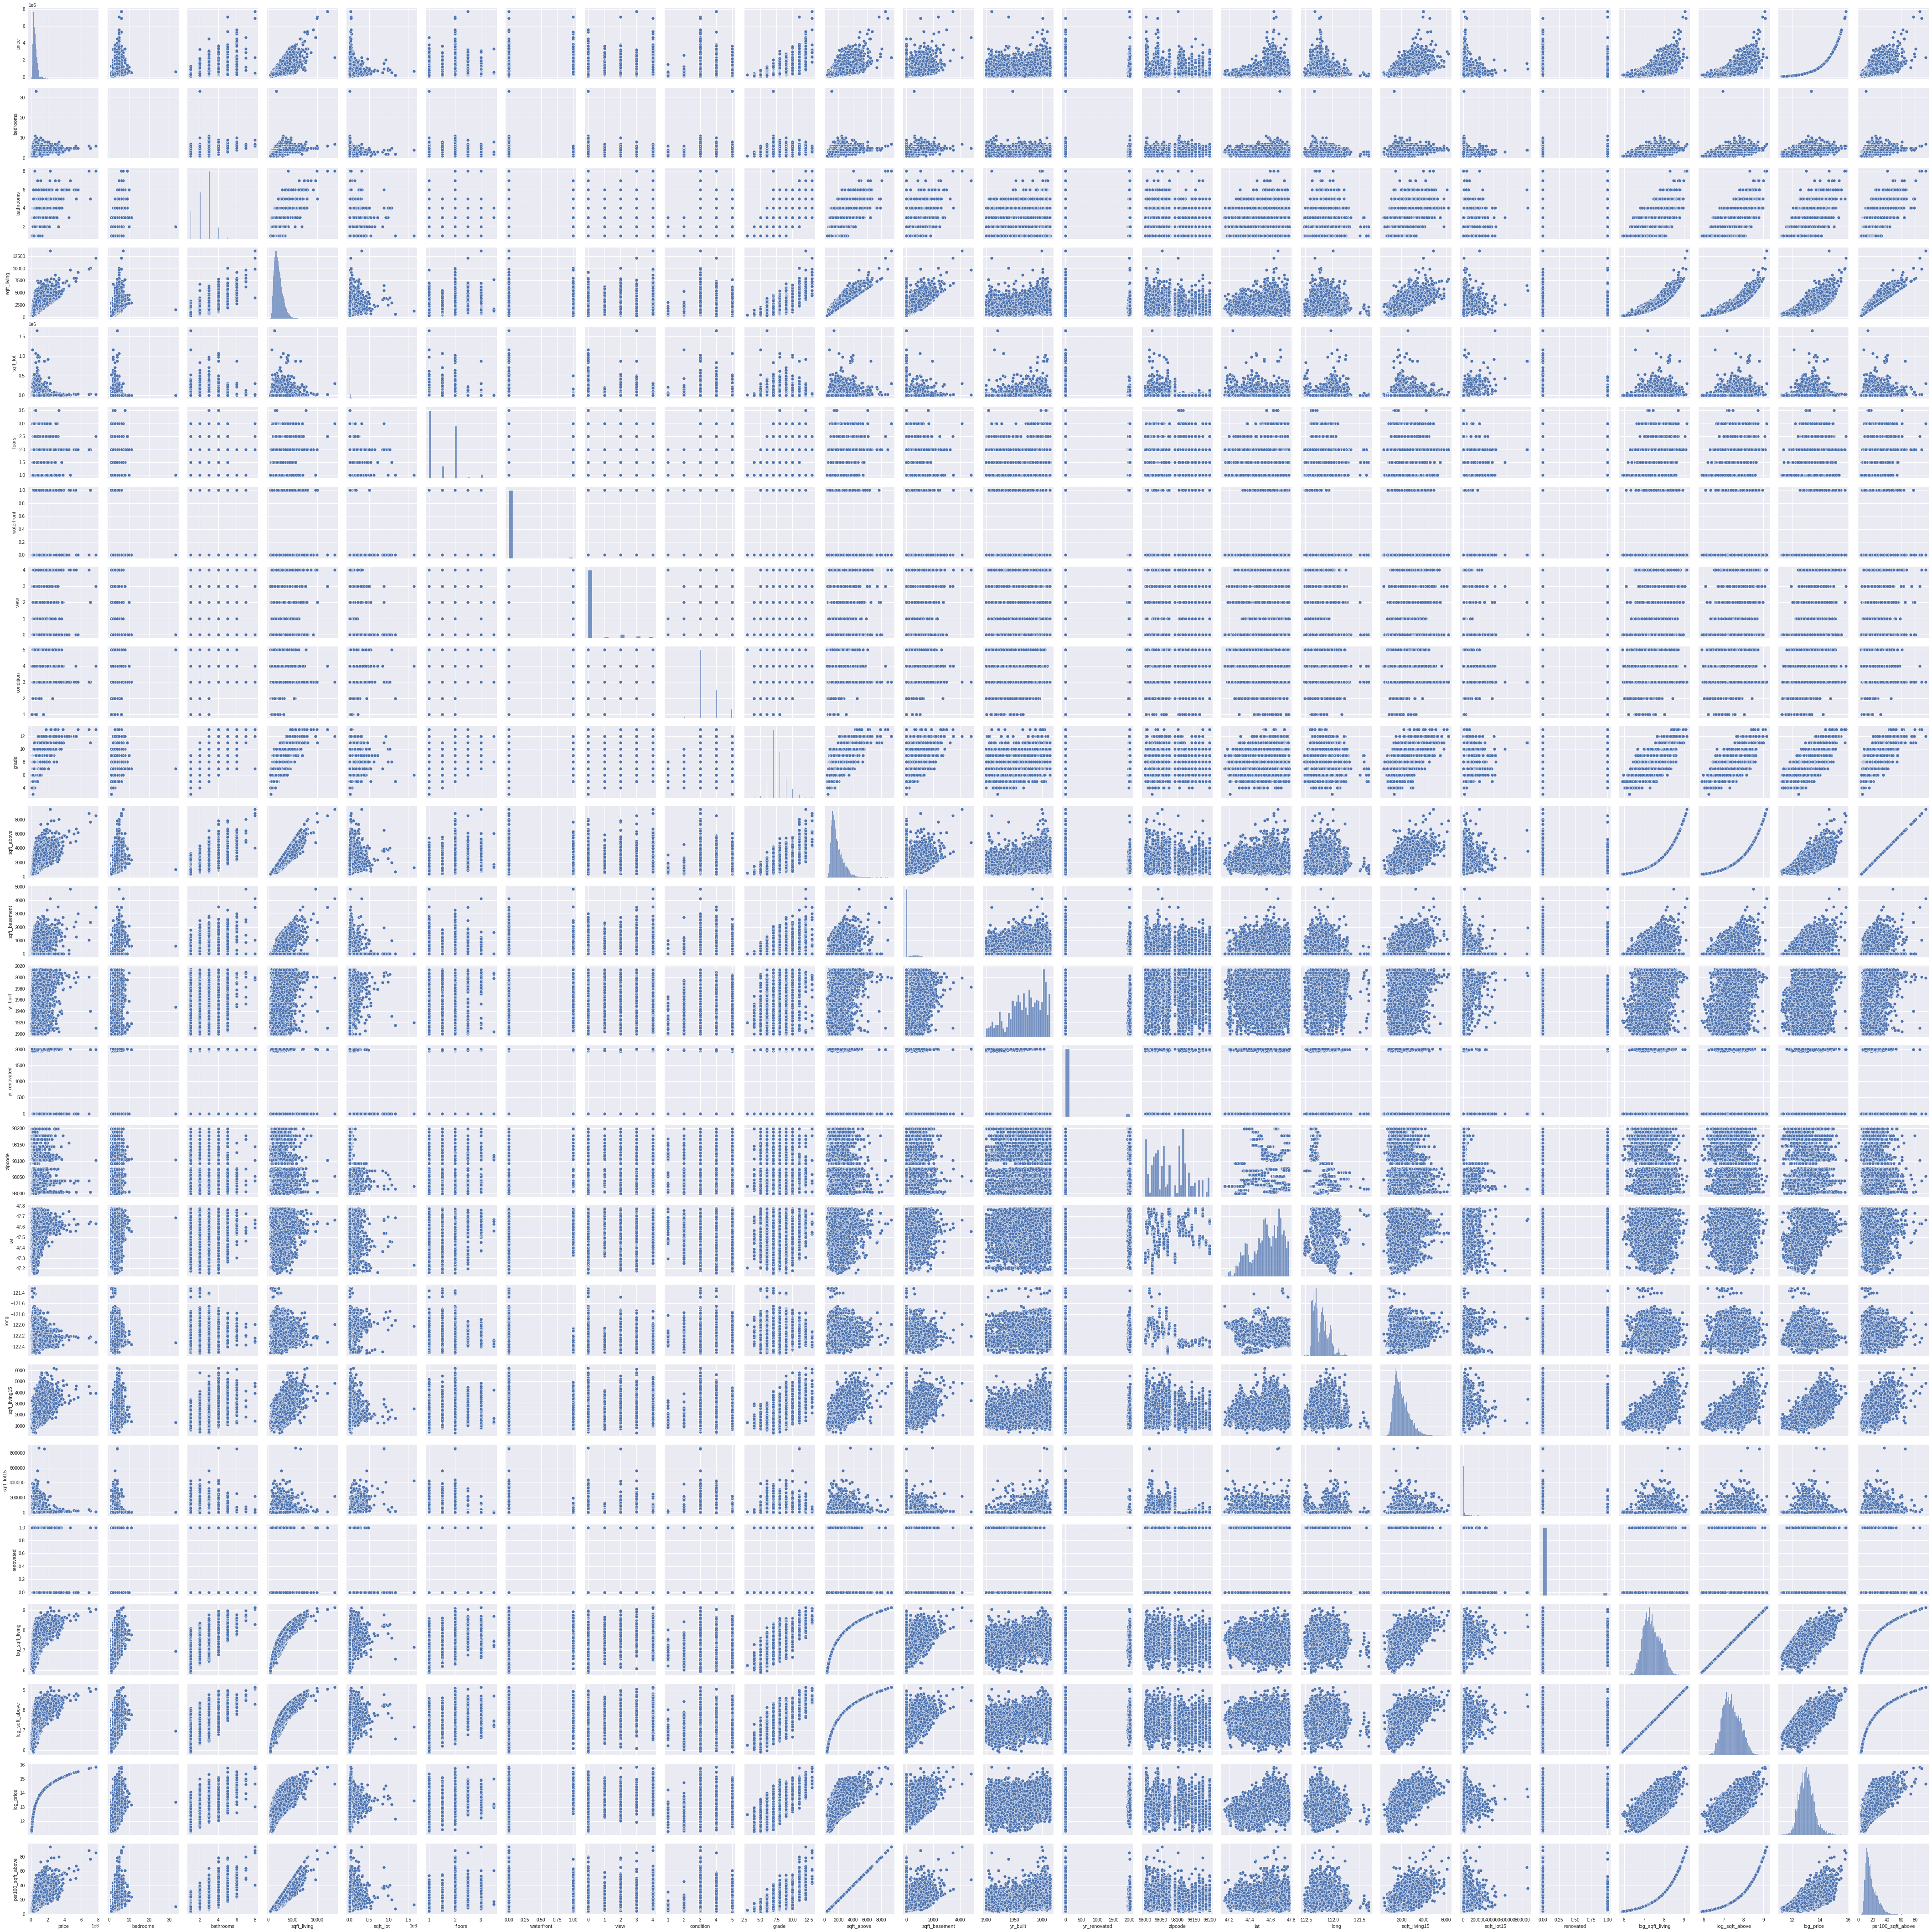

In [424]:
# Basic correlogram
sns.pairplot(df)

In [385]:
df.corr().head()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price        1.000000  0.308763   0.492522     0.701917  0.089868  0.256903   
bedrooms     0.308763  1.000000   0.489752     0.578181  0.032439  0.178126   
bathrooms    0.492522  0.489752   1.000000     0.727706  0.079407  0.529922   
sqft_living  0.701917  0.578181   0.727706     1.000000  0.173436  0.354185   
sqft_lot     0.089868  0.032439   0.079407     0.173436  1.000000 -0.004726   

             waterfront      view  condition     grade  sqft_above  \
price          0.264308  0.393612   0.036039  0.668058    0.605359   
bedrooms      -0.002135  0.078233   0.026392  0.356740    0.479355   
bathrooms      0.057407  0.169863  -0.136758  0.664983    0.669281   
sqft_living    0.104636  0.281731  -0.059517  0.762968    0.876444   
sqft_lot       0.021454  0.075088  -0.008859  0.114798    0.184135   

             sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price             0.321131  0.054004      0.117921 -0.053379  0.306691   
bedrooms          0.297229  0.155904      0.017724 -0.154107 -0.009990   
bathrooms         0.253459  0.541684      0.027903 -0.223541  0.017387   
sqft_living       0.428678  0.318356      0.050992 -0.199767  0.052140   
sqft_lot          0.015009  0.053020      0.005011 -0.129606 -0.085514   

                 long  sqft_living15  sqft_lot15  renovated  
price        0.021997       0.585240    0.082833   0.117609  
bedrooms     0.131976       0.393339    0.030643   0.017458  
bathrooms    0.239361       0.564863    0.081285   0.027478  
sqft_living  0.241141       0.756380    0.184315   0.050761  
sqft_lot     0.230236       0.144750    0.718200   0.005123

## Modelling

### Basic Model sqft_above

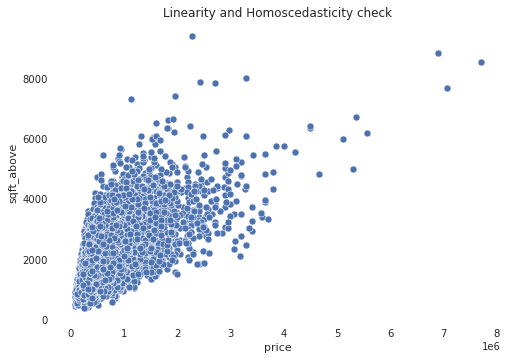

In [391]:
# check for linearity and Homoscedasticity
sns.scatterplot(x=df['price'], y=df['sqft_above'])
plt.title("Linearity and Homoscedasticity check");

In [404]:
# create predictors
predictors = df['sqft_above']
# create model intercept
predictors_int = sm.add_constant(predictors)
# fit model
baseline_model = sm.OLS(df['price'], predictors_int).fit()

# check model
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:54:40   Log-Likelihood:            -3.0239e+05
No. Observations:               21592   AIC:                         6.048e+05
Df Residuals:                   21590   BIC:                         6.048e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.975e+04   4738.468     12.609      0.0

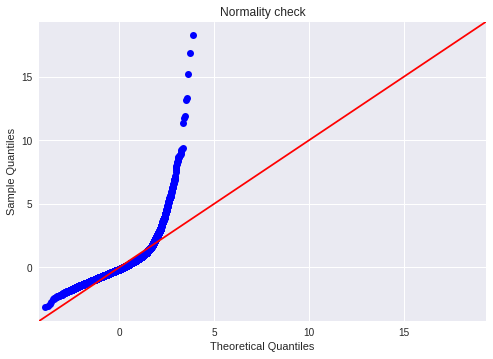

In [405]:
# check normality assumption

residuals = baseline_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

So we see that 2/3 of the assumptions of linearity are violated here - the residuals aren't normally distributed, and the data isn't homoscedastic. We'll get a summary of the model as is, see if performing a log transformation on price and sqft_above will help with these conditions, and then see if adding in some other variables to our model will improve our R^2 .

In [409]:
# apply logarithmic function to independant variable
df['log_sqft_above'] = np.log(df['sqft_above'])


# re-create the model with `log_sqft_living`
# create predictors
predictors = df['log_sqft_above']
# create model intercept
predictors_int = sm.add_constant(predictors)
# fit model
log_model1 = sm.OLS(df['price'], predictors_int).fit()

# check model
print(log_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     9012.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:58:25   Log-Likelihood:            -3.0356e+05
No. Observations:               21592   AIC:                         6.071e+05
Df Residuals:                   21590   BIC:                         6.071e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.912e+06   3.64e+04    -79.

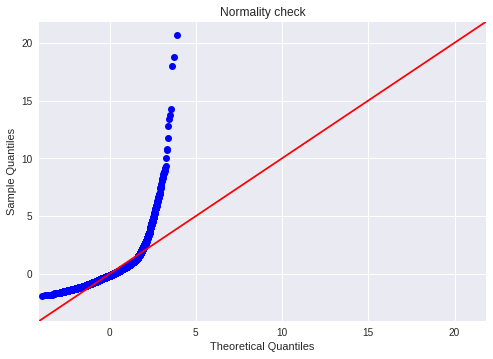

In [408]:
residuals = log_model1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

Our R-sqaured is lowered significantly. Let us perform the log function on price.

In [410]:
# apply logarithmic function to dependant variable
df['log_price'] = np.log(df['price'])


# re-create the model with `sqft_living`
# create predictors
predictors = df['sqft_above']
# create model intercept
predictors_int = sm.add_constant(predictors)
# fit model
log_model2 = sm.OLS(df['log_price'], predictors_int).fit()

# check model
print(log_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                 1.224e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:59:16   Log-Likelihood:                -11940.
No. Observations:               21592   AIC:                         2.388e+04
Df Residuals:                   21590   BIC:                         2.390e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3638      0.007   1813.900      0.0

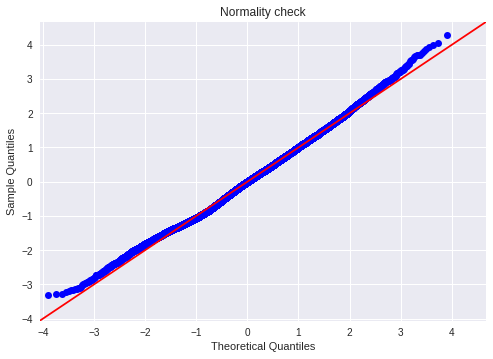

In [411]:
residuals = log_model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

Our R-sqaured is approximately the same as our baseline model.

In [413]:
# re-create the model with `sqft_living`
# create predictors
predictors = df['log_sqft_above']
# create model intercept
predictors_int = sm.add_constant(predictors)
# fit model
log_model3 = sm.OLS(df['log_price'], predictors_int).fit()

# check model
print(log_model3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                 1.129e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:01:20   Log-Likelihood:                -12249.
No. Observations:               21592   AIC:                         2.450e+04
Df Residuals:                   21590   BIC:                         2.452e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.7058      0.050    153.

The R-sqaured is slightly lowered so we''ll stick with the log2 model where only price is log transformed.

## Bedrooms


In [418]:
# create predictors
predictors = df[['sqft_above', 'bedrooms']]
# create model intercept
predictors_int = sm.add_constant(predictors)
# fit model
second_model = sm.OLS(df['log_price'], predictors_int).fit()

# check model
print(second_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     6226.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:07:48   Log-Likelihood:                -11874.
No. Observations:               21592   AIC:                         2.375e+04
Df Residuals:                   21589   BIC:                         2.378e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2658      0.011   1129.199      0.0

So we see here that in this model, our R^2 has dropped a little. That may be due to high multicollinearity between sqft_above and bedrooms. 

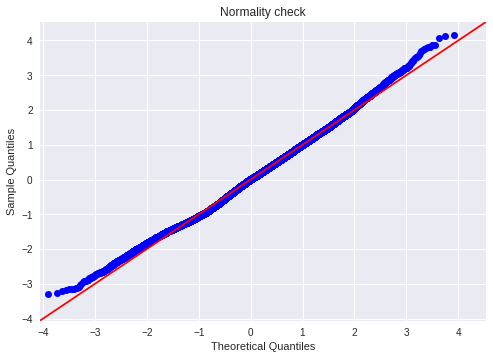

In [419]:
# check normality assumption

residuals = second_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

## Results and Conclusion

1. Will increasing the living above size lead to an associated increase in the value of the home?

In [420]:
#divinding by 100 to get 
df['per100_sqft_above'] = (df['sqft_above']/100)

In [422]:
# re-create the model with `sqft_living`
# create predictors
predictors = df['per100_sqft_above']
# create model intercept
predictors_int = sm.add_constant(predictors)
# fit model
log_model4 = sm.OLS(df['log_price'], predictors_int).fit()

# check model
print(log_model4.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                 1.224e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:12:55   Log-Likelihood:                -11940.
No. Observations:               21592   AIC:                         2.388e+04
Df Residuals:                   21590   BIC:                         2.390e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.3638      0.00

So we see here that there is a fairly large association between the log price of a home and its square foot above. This also has a small standard error, and confidence interval, making it as a very accurate metric! As such, we can say that for every 100 square foot increased of living space in a home there is an association of an increase of .0383 of the log price.

2. Will adding bedrooms lead to an associated increase in the value of the home?

In [423]:
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     6226.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:18:23   Log-Likelihood:                -11874.
No. Observations:               21592   AIC:                         2.375e+04
Df Residuals:                   21589   BIC:                         2.378e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2658      0.011   1129.199      0.000      12.245      12.287
sqft_above     0.0004   3.93e-06     91.866      0.000       0.000       0.000
bedrooms       0.0406      0.004     11.557      0.000       0.034       0.047
==============================================================================
Omnibus:                      116.370   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.789
Skew:                           0.177   Prob(JB):                     2.64e-26
Kurtosis:                       2.929   Cond. No.                     7.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on this model, we can see that adding bedrooms and bathrooms are both associated with an increase in the log price. The r-sqaured is approximately the same as in our previous model 36.6%, which indicates that the number of bedrooms explains approximately the same of the log price than sqft_above. It's important to remember that there is likely collinearity between sqft_above and bedrooms, which could have led to such results we saw in the analysis. That being said, we see that adding one bedroom is associated with a .05 (rounded) increase in log price,